In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np


In [2]:
bna_weather = pd.read_csv('../data/bna_weather.csv')
headway_data = pd.read_csv('../data/Headway Data.csv')

In [3]:
bna_weather.head()

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01 00:53:00,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01 01:30:00,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01 01:53:00,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01 02:53:00,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01 03:53:00,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bna_weather.shape

(9739, 46)

In [5]:
headway_data.shape

(1981715, 30)

In [6]:
headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [7]:
# headway_data.info()

In [8]:
bna_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       9739 non-null   object 
 1   key                        9739 non-null   object 
 2   class                      9739 non-null   object 
 3   expire_time_gmt            9739 non-null   int64  
 4   obs_id                     9739 non-null   object 
 5   obs_name                   9739 non-null   object 
 6   valid_time_gmt             9739 non-null   int64  
 7   day_ind                    9739 non-null   object 
 8   temp                       9739 non-null   int64  
 9   wx_icon                    9739 non-null   int64  
 10  icon_extd                  9739 non-null   int64  
 11  wx_phrase                  9739 non-null   object 
 12  pressure_tend              2885 non-null   float64
 13  pressure_desc              2885 non-null   objec

In [9]:
headway_data.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [10]:
# headway_data.isna().sum()

In [11]:
bna_weather.isna().sum()

Date                            0
key                             0
class                           0
expire_time_gmt                 0
obs_id                          0
obs_name                        0
valid_time_gmt                  0
day_ind                         0
temp                            0
wx_icon                         0
icon_extd                       0
wx_phrase                       0
pressure_tend                6854
pressure_desc                6854
dewPt                           0
heat_index                      0
rh                              0
pressure                        0
vis                             4
wc                              8
wdir                         1522
wdir_cardinal                   8
gust                         8279
wspd                            8
max_temp                     9378
min_temp                     9378
precip_total                 9636
precip_hrly                     0
snow_hrly                    9730
uv_desc       

In [12]:
bna_weather = bna_weather.drop(['icon_extd','clds','wdir_cardinal','uv_index','uv_desc','key','class','expire_time_gmt','obs_name','valid_time_gmt','day_ind','obs_id','min_temp','qualifier','qualifier_svrty', 'blunt_phrase','terse_phrase', 'water_temp', 'primary_wave_period','primary_wave_height','primary_swell_period', 'primary_swell_height', 'primary_swell_direction', 'secondary_swell_period', 'secondary_swell_height', 'secondary_swell_direction','gust','wdir','wc'], axis=1)

In [13]:
#converting date column in bna_weather to just date
bna_weather['Time'] = pd.to_datetime(bna_weather['Date']).dt.time
bna_weather.head()

,Date,temp,wx_icon,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,feels_like,Time
0,2021-11-01 00:53:00,51,26,Cloudy,1.0,Rising,43,51,74,29.59,10.0,9.0,68.0,NaN,0.0,NaN,51.0,00:53:00
1,2021-11-01 01:30:00,50,29,Partly Cloudy,NaN,NaN,42,50,74,29.59,10.0,8.0,NaN,NaN,0.0,NaN,50.0,01:30:00
2,2021-11-01 01:53:00,49,33,Fair,NaN,NaN,42,49,77,29.59,10.0,6.0,NaN,NaN,0.0,NaN,47.0,01:53:00
3,2021-11-01 02:53:00,48,33,Fair,NaN,NaN,41,48,77,29.60,10.0,3.0,NaN,NaN,0.0,NaN,48.0,02:53:00
4,2021-11-01 03:53:00,47,33,Fair,1.0,Rising Rapidly,41,47,80,29.61,10.0,0.0,NaN,NaN,0.0,NaN,47.0,03:53:00


In [14]:
bna_weather['Date'] = pd.to_datetime(bna_weather['Date']).dt.date
bna_weather.head()

,Date,temp,wx_icon,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,feels_like,Time
0,2021-11-01,51,26,Cloudy,1.0,Rising,43,51,74,29.59,10.0,9.0,68.0,NaN,0.0,NaN,51.0,00:53:00
1,2021-11-01,50,29,Partly Cloudy,NaN,NaN,42,50,74,29.59,10.0,8.0,NaN,NaN,0.0,NaN,50.0,01:30:00
2,2021-11-01,49,33,Fair,NaN,NaN,42,49,77,29.59,10.0,6.0,NaN,NaN,0.0,NaN,47.0,01:53:00
3,2021-11-01,48,33,Fair,NaN,NaN,41,48,77,29.60,10.0,3.0,NaN,NaN,0.0,NaN,48.0,02:53:00
4,2021-11-01,47,33,Fair,1.0,Rising Rapidly,41,47,80,29.61,10.0,0.0,NaN,NaN,0.0,NaN,47.0,03:53:00


In [15]:
#trying to find simplified hour in order to join tables
bna_weather['Time'] = bna_weather['Time'].astype(str)

In [16]:
headway_data['DATE'] = pd.to_datetime(headway_data['DATE']).dt.date

In [17]:
bna_weather["Hour"] = bna_weather['Time'].str[:2]
bna_weather.head(50)

,Date,temp,wx_icon,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,feels_like,Time,Hour
0,2021-11-01,51,26,Cloudy,1.0,Rising,43,51,74,29.59,10.0,9.0,68.0,NaN,0.0,NaN,51.0,00:53:00,00
1,2021-11-01,50,29,Partly Cloudy,NaN,NaN,42,50,74,29.59,10.0,8.0,NaN,NaN,0.0,NaN,50.0,01:30:00,01
2,2021-11-01,49,33,Fair,NaN,NaN,42,49,77,29.59,10.0,6.0,NaN,NaN,0.0,NaN,47.0,01:53:00,01
3,2021-11-01,48,33,Fair,NaN,NaN,41,48,77,29.60,10.0,3.0,NaN,NaN,0.0,NaN,48.0,02:53:00,02
4,2021-11-01,47,33,Fair,1.0,Rising Rapidly,41,47,80,29.61,10.0,0.0,NaN,NaN,0.0,NaN,47.0,03:53:00,03
5,2021-11-01,45,33,Fair,NaN,NaN,40,45,82,29.63,8.0,3.0,NaN,NaN,0.0,NaN,45.0,04:53:00,04
6,2021-11-01,46,33,Fair,NaN,NaN,41,46,83,29.63,10.0,6.0,NaN,NaN,0.0,NaN,43.0,05:53:00,05
7,2021-11-01,45,34,Fair,1.0,Rising,40,45,82,29.65,9.0,7.0,NaN,NaN,0.0,NaN,41.0,06:53:00,06
8,2021-11-01,47,34,Fair,NaN,NaN,41,47,80,29.66,9.0,7.0,NaN,NaN,0.0,NaN,44.0,07:53:00,07
9,2021-11-01,50,34,Fair,NaN,NaN,42,50,74,29.69,10.0,6.0,NaN,NaN,0.0,NaN,50.0,08:53:00,08


In [18]:
#converting date column in bna_weather to just date
bna_weather['Date'] = pd.to_datetime(bna_weather['Date']).dt.date

In [19]:
#converting time column to hour
headway_data["SCHEDULED_TIME"] = headway_data['SCHEDULED_TIME'].astype(str)

In [20]:
headway_data["Hour"] = headway_data['SCHEDULED_TIME'].str[:2]


In [21]:
MERGETEST1 = headway_data[headway_data["TRIP_ID"].isin([298143.0])]
MERGETEST1

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,Hour
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,2,12.333333,04
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,9,0.000000,04
7,120211101,1,76447971,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,19,0.000000,04
8,120211101,1,76447972,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,35,0.000000,05
5925,120211102,1,76490148,2021-11-02,22,2200,1391,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,2,0.000000,04
5926,120211102,1,76490149,2021-11-02,22,2200,1391,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,9,0.000000,04
5927,120211102,1,76490150,2021-11-02,22,2200,1391,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,19,0.000000,04
5928,120211102,1,76490151,2021-11-02,22,2200,1391,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,35,0.000000,05
11818,120211103,1,76532354,2021-11-03,22,2200,1593,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,2,0.000000,04
11819,120211103,1,76532355,2021-11-03,22,2200,1593,298143,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,9,0.000000,04


In [22]:
bna_weather.shape

(9739, 19)

In [23]:
# bna_weather = bna_weather.groupby('Date', as_index=False).max()

In [24]:
bna_weather.head()

,Date,temp,wx_icon,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,feels_like,Time,Hour
0,2021-11-01,51,26,Cloudy,1.0,Rising,43,51,74,29.59,10.0,9.0,68.0,NaN,0.0,NaN,51.0,00:53:00,00
1,2021-11-01,50,29,Partly Cloudy,NaN,NaN,42,50,74,29.59,10.0,8.0,NaN,NaN,0.0,NaN,50.0,01:30:00,01
2,2021-11-01,49,33,Fair,NaN,NaN,42,49,77,29.59,10.0,6.0,NaN,NaN,0.0,NaN,47.0,01:53:00,01
3,2021-11-01,48,33,Fair,NaN,NaN,41,48,77,29.60,10.0,3.0,NaN,NaN,0.0,NaN,48.0,02:53:00,02
4,2021-11-01,47,33,Fair,1.0,Rising Rapidly,41,47,80,29.61,10.0,0.0,NaN,NaN,0.0,NaN,47.0,03:53:00,03


In [25]:
bna_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9739 non-null   object 
 1   temp           9739 non-null   int64  
 2   wx_icon        9739 non-null   int64  
 3   wx_phrase      9739 non-null   object 
 4   pressure_tend  2885 non-null   float64
 5   pressure_desc  2885 non-null   object 
 6   dewPt          9739 non-null   int64  
 7   heat_index     9739 non-null   int64  
 8   rh             9739 non-null   int64  
 9   pressure       9739 non-null   float64
 10  vis            9735 non-null   float64
 11  wspd           9731 non-null   float64
 12  max_temp       361 non-null    float64
 13  precip_total   103 non-null    float64
 14  precip_hrly    9739 non-null   float64
 15  snow_hrly      9 non-null      float64
 16  feels_like     9738 non-null   float64
 17  Time           9739 non-null   object 
 18  Hour    

In [26]:
headway_data.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,Hour
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,1.983333,0,0,1,0,0.0,0,2,12.650000,14
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,3.333333,0,0,1,0,0.0,0,11,0.000000,14
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,23,22.416666,14
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,24,5.766666,15
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,25,0.000000,15


In [27]:
headway_data.rename(columns = {'DATE':'Date'}, inplace = True)
headway_data.shape

(1981715, 31)

In [28]:
#converting date fields into string bc merge is showing all nulls for temp data

In [29]:
# bna_weather.info()

In [30]:
# headway_data.info()

In [31]:
# combined_df = headway_data.merge(bna_weather, on=["Date","Hour"],how="left")

In [32]:
combined_df = headway_data.merge(bna_weather, on=["Date","Hour"],how="left",indicator=True)

In [33]:
combined_df.shape

(2210137, 49)

In [34]:
combined_df = combined_df.drop(['OVERLOAD_ID','CALENDAR_ID','BLOCK_STOP_ORDER','feels_like','STOP_CANCELLED','PREV_SCHED_STOP_CANCELLED','DWELL_IN_MINS','SERVICE_ABBR','BLOCK_ABBR','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT','IS_RELIEF','wx_icon','pressure_tend'], axis=1)

In [35]:
combined_df.isna().sum()

ADHERENCE_ID                   0
Date                           0
ROUTE_ABBR                     0
OPERATOR                       0
TRIP_ID                        0
ROUTE_DIRECTION_NAME           0
TIME_POINT_ABBR                0
ROUTE_STOP_SEQUENCE           43
TRIP_EDGE                      0
LATITUDE                       0
LONGITUDE                      0
SCHEDULED_TIME                 0
ACTUAL_ARRIVAL_TIME        60939
ACTUAL_DEPARTURE_TIME      61003
ADHERENCE                  61003
SCHEDULED_HDWY            481571
ACTUAL_HDWY               528331
HDWY_DEV                  528910
Hour                           0
temp                       33913
wx_phrase                  33913
pressure_desc            1568505
dewPt                      33913
heat_index                 33913
rh                         33913
pressure                   33913
vis                        35328
wspd                       35148
max_temp                 2197936
precip_total             2184567
precip_hrl

In [36]:
combined_df.head(50)

,ADHERENCE_ID,Date,ROUTE_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,...,rh,pressure,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,Time,_merge
0,76447164,2021-11-01,7,2088,297750,TO DOWNTOWN,HBHS,4.0,1,36.107575,...,38.0,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both
1,76447165,2021-11-01,7,2088,297750,TO DOWNTOWN,21BK,3.0,0,36.138372,...,38.0,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both
2,76447166,2021-11-01,7,2088,297750,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,...,38.0,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both
3,76447167,2021-11-01,50,2088,297749,TO DOWNTOWN,MLKS,7.0,1,36.161008,...,34.0,29.61,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both
4,76447168,2021-11-01,50,2088,297749,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,...,34.0,29.61,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both
5,76447969,2021-11-01,22,1352,298143,TO DOWNTOWN,MHSP,15.0,1,36.178360,...,82.0,29.63,8.0,3.0,NaN,NaN,0.0,NaN,04:53:00,both
6,76447970,2021-11-01,22,1352,298143,TO DOWNTOWN,ELIZ,11.0,0,36.193454,...,82.0,29.63,8.0,3.0,NaN,NaN,0.0,NaN,04:53:00,both
7,76447971,2021-11-01,22,1352,298143,TO DOWNTOWN,CV23,6.0,0,36.182177,...,82.0,29.63,8.0,3.0,NaN,NaN,0.0,NaN,04:53:00,both
8,76447972,2021-11-01,22,1352,298143,TO DOWNTOWN,MCC5_12,4.0,2,36.167091,...,83.0,29.63,10.0,6.0,NaN,NaN,0.0,NaN,05:53:00,both
9,76447973,2021-11-01,22,1352,298162,FROM DOWNTOWN,MCC5_12,4.0,1,36.167091,...,83.0,29.63,10.0,6.0,NaN,NaN,0.0,NaN,05:53:00,both


In [37]:
# MERGETEST2 = combined_df[combined_df["_merge"].isin(["left_only"])]
# MERGETEST2

In [38]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210137 entries, 0 to 2210136
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ADHERENCE_ID           int64   
 1   Date                   object  
 2   ROUTE_ABBR             int64   
 3   OPERATOR               int64   
 4   TRIP_ID                int64   
 5   ROUTE_DIRECTION_NAME   object  
 6   TIME_POINT_ABBR        object  
 7   ROUTE_STOP_SEQUENCE    float64 
 8   TRIP_EDGE              int64   
 9   LATITUDE               float64 
 10  LONGITUDE              float64 
 11  SCHEDULED_TIME         object  
 12  ACTUAL_ARRIVAL_TIME    object  
 13  ACTUAL_DEPARTURE_TIME  object  
 14  ADHERENCE              float64 
 15  SCHEDULED_HDWY         float64 
 16  ACTUAL_HDWY            float64 
 17  HDWY_DEV               float64 
 18  Hour                   object  
 19  temp                   float64 
 20  wx_phrase              object  
 21  pressure_desc          object  

In [39]:
combined_df = combined_df.drop(['LATITUDE','LONGITUDE','OPERATOR','ROUTE_STOP_SEQUENCE','ACTUAL_ARRIVAL_TIME','ACTUAL_DEPARTURE_TIME'], axis=1)

In [40]:
combined_df.head()

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,rh,pressure,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,Time,_merge
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,38.0,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,38.0,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,38.0,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,34.0,29.61,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,34.0,29.61,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both


In [41]:
combined_df['PERC_OF_HEADWAY'] = combined_df['HDWY_DEV']/combined_df['SCHEDULED_HDWY']

In [42]:
combined_df.head()

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,pressure,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,Time,_merge,PERC_OF_HEADWAY
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both,0.141667
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both,0.238095
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,29.63,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both,NaN
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,29.61,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both,NaN
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,29.61,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both,NaN


In [43]:
def GAPPED_OR_BUNCHED(value):
    if value >= 0.5:
        return "Gapped"
    elif value <= -0.5:
        return "Bunched"
    else:
        return "On Time"

combined_df['GAPPED_OR_BUNCHED'] = combined_df['PERC_OF_HEADWAY'].map(GAPPED_OR_BUNCHED)
combined_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,vis,wspd,max_temp,precip_total,precip_hrly,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both,0.141667,On Time
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both,0.238095,On Time
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,10.0,5.0,NaN,NaN,0.0,NaN,14:53:00,both,NaN,On Time
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both,NaN,On Time
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,10.0,3.0,NaN,NaN,0.0,NaN,15:53:00,both,NaN,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,91057724,2022-11-01,50,329980,TO DOWNTOWN,MCC4_20,2,15:18:00,-2.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time
2210133,91057851,2022-11-01,50,330003,TO DOWNTOWN,MLKS,1,15:20:00,12.900000,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,-0.236667,On Time
2210134,91057852,2022-11-01,50,330003,TO DOWNTOWN,MCC5_11,2,15:37:00,26.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time
2210135,91057881,2022-11-01,56,330011,TO DOWNTOWN,MEIG,1,15:20:00,0.966666,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time


In [44]:
#adding is_raining column to determine if it's...raining
def IS_RAINING(value):
    if value > 0:
        return "Raining"
    else:
        return "No Rain"

combined_df['IS_RAINING'] = combined_df['precip_hrly'].map(IS_RAINING)
combined_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,wspd,max_temp,precip_total,precip_hrly,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,5.0,NaN,NaN,0.0,NaN,14:53:00,both,0.141667,On Time,No Rain
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,5.0,NaN,NaN,0.0,NaN,14:53:00,both,0.238095,On Time,No Rain
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,5.0,NaN,NaN,0.0,NaN,14:53:00,both,NaN,On Time,No Rain
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,3.0,NaN,NaN,0.0,NaN,15:53:00,both,NaN,On Time,No Rain
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,3.0,NaN,NaN,0.0,NaN,15:53:00,both,NaN,On Time,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,91057724,2022-11-01,50,329980,TO DOWNTOWN,MCC4_20,2,15:18:00,-2.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain
2210133,91057851,2022-11-01,50,330003,TO DOWNTOWN,MLKS,1,15:20:00,12.900000,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,-0.236667,On Time,No Rain
2210134,91057852,2022-11-01,50,330003,TO DOWNTOWN,MCC5_11,2,15:37:00,26.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain
2210135,91057881,2022-11-01,56,330011,TO DOWNTOWN,MEIG,1,15:20:00,0.966666,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain


In [45]:
rain_df = combined_df[combined_df['IS_RAINING'] == "Raining"]

In [131]:
rain_df2 = rain_df.drop_duplicates(['Date'])

In [132]:
rain_df2['Date'].count()

366

In [46]:
rain_df = combined_df[combined_df['ADHERENCE'] > -200]

<AxesSubplot:xlabel='ADHERENCE', ylabel='precip_hrly'>

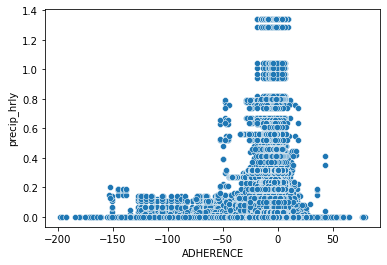

In [47]:
#trying to find correlation between rain and adherence

sns.scatterplot(x="ADHERENCE",
               y="precip_hrly",
               data= rain_df)

In [48]:
# rain_gapped_or_bunched_df = combined_df[(combined_df['GAPPED_OR_BUNCHED'] != "On Time") & (combined_df['precip_hrly'] > 0)]
# rain_gapped_or_bunched_df

In [49]:
# sns.histplot(x = "IS_RAINING", hue="GAPPED_OR_BUNCHED", stat="percent", multiple="dodge", shrink=.8, data= combined_df)


In [50]:
# reducing data frame to group by rain/no rain status and turn into % of total
percent_test = combined_df.groupby(['IS_RAINING', 'GAPPED_OR_BUNCHED']).agg({'TRIP_ID': 'count'})
rain_vs_norain = percent_test.groupby(level=0).apply(lambda x:
                                              100* x/float(x.sum()))
rain_vs_norain

TRIP_ID
IS_RAINING GAPPED_OR_BUNCHED           
No Rain    Bunched             3.522064
           Gapped              4.345842
           On Time            92.132094
Raining    Bunched             3.736137
           Gapped              4.937910
           On Time            91.325953

In [51]:
rain_vs_norain = rain_vs_norain.round(2)

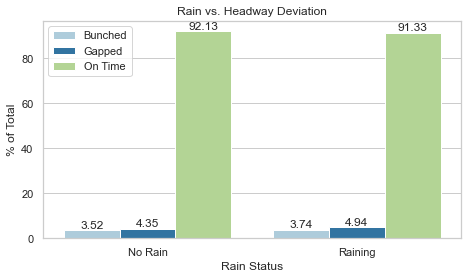

In [128]:
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(7.5,4))
p = sns.barplot(x='IS_RAINING',
           y='TRIP_ID',
           hue= 'GAPPED_OR_BUNCHED',
            palette='Paired',
           data = rain_vs_norain.reset_index())
for i in p.containers:
    p.bar_label(i,)
plt.xlabel('Rain Status')
plt.ylabel('% of Total')
plt.title('Rain vs. Headway Deviation')
plt.gca().legend().set_title('')

In [53]:
#column for snowing

def IS_SNOWING(value):
    if value > 0:
        return "Snowing"
    else:
        return "Not Snowing"

combined_df['IS_SNOWING'] = combined_df['snow_hrly'].map(IS_SNOWING)
combined_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,max_temp,precip_total,precip_hrly,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,NaN,NaN,0.0,NaN,14:53:00,both,0.141667,On Time,No Rain,Not Snowing
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,NaN,NaN,0.0,NaN,14:53:00,both,0.238095,On Time,No Rain,Not Snowing
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,NaN,NaN,0.0,NaN,14:53:00,both,NaN,On Time,No Rain,Not Snowing
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,NaN,NaN,0.0,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,NaN,NaN,0.0,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,91057724,2022-11-01,50,329980,TO DOWNTOWN,MCC4_20,2,15:18:00,-2.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing
2210133,91057851,2022-11-01,50,330003,TO DOWNTOWN,MLKS,1,15:20:00,12.900000,10.0,...,NaN,NaN,NaN,NaN,NaN,left_only,-0.236667,On Time,No Rain,Not Snowing
2210134,91057852,2022-11-01,50,330003,TO DOWNTOWN,MCC5_11,2,15:37:00,26.733333,NaN,...,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing
2210135,91057881,2022-11-01,56,330011,TO DOWNTOWN,MEIG,1,15:20:00,0.966666,0.0,...,NaN,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing


In [112]:
def precipitation_type(row):
    if row["precip_hrly"] > 0:
        return "Raining"
    elif row["IS_SNOWING"] == "Snowing":
        return "Snowing"
    else:
        return  "No Precipitation"
combined_df['precipitation_type'] = combined_df.apply(precipitation_type, axis=1)
combined_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED,IS_FREEZING,BUNCHED,Precipitation_Type,precipitation_type
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,both,0.141667,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,both,0.238095,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,91057724,2022-11-01,50,329980,TO DOWNTOWN,MCC4_20,2,15:18:00,-2.733333,NaN,...,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation
2210133,91057851,2022-11-01,50,330003,TO DOWNTOWN,MLKS,1,15:20:00,12.900000,10.0,...,left_only,-0.236667,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation
2210134,91057852,2022-11-01,50,330003,TO DOWNTOWN,MCC5_11,2,15:37:00,26.733333,NaN,...,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation
2210135,91057881,2022-11-01,56,330011,TO DOWNTOWN,MEIG,1,15:20:00,0.966666,0.0,...,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation


In [105]:
#dropping nulls from df
combined_df_no_nulls = combined_df.dropna(subset=['PERC_OF_HEADWAY'])
combined_df_no_nulls

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED,IS_FREEZING,BUNCHED,Precipitation_Type,precipitation_type
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,both,0.141667,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,both,0.238095,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
12,76447976,2021-11-01,22,298128,TO DOWNTOWN,MHSP,1,05:42:00,-1.050000,35.0,...,both,-0.010476,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
13,76447977,2021-11-01,22,298128,TO DOWNTOWN,ELIZ,0,05:46:00,-2.250000,35.0,...,both,0.024762,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
14,76447978,2021-11-01,22,298128,TO DOWNTOWN,CV23,0,05:54:00,-0.383333,15.0,...,both,-0.067778,On Time,No Rain,Not Snowing,0,Above Freezing,0,0,No Precipitation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210117,91056031,2022-11-01,7,329461,TO DOWNTOWN,HBHS,1,17:07:00,-1.316666,18.0,...,left_only,-0.063889,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation
2210118,91056032,2022-11-01,7,329461,TO DOWNTOWN,21BK,0,17:16:00,-6.783333,17.0,...,left_only,-0.147059,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation
2210120,91056034,2022-11-01,7,329459,FROM DOWNTOWN,MCC5_9,1,17:45:00,-1.166666,15.0,...,left_only,-0.125556,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation
2210121,91056035,2022-11-01,7,329459,FROM DOWNTOWN,21BK,0,18:01:00,-4.216666,14.0,...,left_only,-0.465476,On Time,No Rain,Not Snowing,0,Below Freezing,0,0,No Precipitation


In [115]:
combined_df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507347 entries, 0 to 2210133
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   ADHERENCE_ID          1507347 non-null  int64   
 1   Date                  1507347 non-null  object  
 2   ROUTE_ABBR            1507347 non-null  int64   
 3   TRIP_ID               1507347 non-null  int64   
 4   ROUTE_DIRECTION_NAME  1507347 non-null  object  
 5   TIME_POINT_ABBR       1507347 non-null  object  
 6   TRIP_EDGE             1507347 non-null  int64   
 7   SCHEDULED_TIME        1507347 non-null  object  
 8   ADHERENCE             1507347 non-null  float64 
 9   SCHEDULED_HDWY        1507347 non-null  float64 
 10  ACTUAL_HDWY           1507347 non-null  float64 
 11  HDWY_DEV              1507347 non-null  float64 
 12  Hour                  1507347 non-null  object  
 13  temp                  1483837 non-null  float64 
 14  wx_phrase         

In [107]:
#removing duplicates
combined_df_no_nulls = combined_df_no_nulls.drop_duplicates(['ADHERENCE_ID'])


In [82]:
combined_df_no_nulls['GAPPED_OR_BUNCHED'].value_counts()

On Time    1350769
Gapped       86564
Bunched      70014
Name: GAPPED_OR_BUNCHED, dtype: int64

In [114]:
combined_df_no_nulls['precipitation_type'].value_counts()

No Precipitation    1437191
Raining               70156
Name: precipitation_type, dtype: int64

C:\Users\kalmc\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\kalmc\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kalmc\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


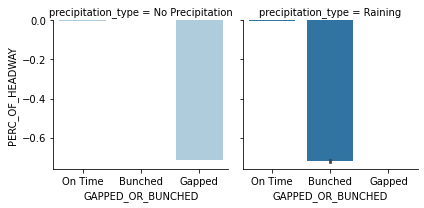

In [116]:
# trying to figure out a facet grid to show different 
graph = sns.FacetGrid(combined_df, col = "precipitation_type", hue="precipitation_type",palette="Paired")
graph.map(sns.barplot, "GAPPED_OR_BUNCHED", "PERC_OF_HEADWAY")
plt.show()

In [83]:
snow_groupby = combined_df_no_nulls.groupby(['IS_SNOWING', 'GAPPED_OR_BUNCHED']).agg({'TRIP_ID': 'count'})
snow_vs_nosnow = snow_groupby.groupby(level=0).apply(lambda x:
                                              100* x/float(x.sum()))
snow_vs_nosnow

TRIP_ID
IS_SNOWING  GAPPED_OR_BUNCHED           
Not Snowing Bunched             4.643557
            Gapped              5.741162
            On Time            89.615281
Snowing     Bunched            12.500000
            Gapped             15.725806
            On Time            71.774194

In [84]:
snow_vs_nosnow = snow_vs_nosnow.round(2)

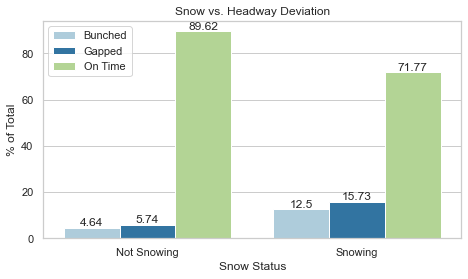

In [127]:
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(7.5,4))
p = sns.barplot(x='IS_SNOWING',
           y='TRIP_ID',
           hue= 'GAPPED_OR_BUNCHED',
            palette='Paired',    
           data = snow_vs_nosnow.reset_index())
for i in p.containers:
    p.bar_label(i,)
plt.xlabel('Snow Status')
plt.ylabel('% of Total')
plt.title('Snow vs. Headway Deviation')
plt.gca().legend().set_title('')

In [58]:
#see how much snow negatively affects adherence

snow_df = combined_df[(combined_df['IS_SNOWING']=="Snowing")]
snow_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,max_temp,precip_total,precip_hrly,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING
381939,79332864,2022-01-06,22,302542,TO DOWNTOWN,MCC5_12,2,08:10:00,2.433333,NaN,...,NaN,NaN,0.12,1.0,08:53:00,both,NaN,On Time,Raining,Snowing
381943,79332865,2022-01-06,22,302565,FROM DOWNTOWN,MCC5_12,1,08:15:00,-2.716666,30.0,...,NaN,NaN,0.12,1.0,08:53:00,both,-0.009444,On Time,Raining,Snowing
381947,79332866,2022-01-06,22,302565,FROM DOWNTOWN,CV23,0,08:25:00,-4.050000,15.0,...,NaN,NaN,0.12,1.0,08:53:00,both,0.003333,On Time,Raining,Snowing
381951,79332867,2022-01-06,22,302565,FROM DOWNTOWN,MHSP,2,08:35:00,-3.283333,NaN,...,NaN,NaN,0.12,1.0,08:53:00,both,NaN,On Time,Raining,Snowing
381955,79332868,2022-01-06,22,302543,TO DOWNTOWN,MHSP,1,08:45:00,0.516666,60.0,...,NaN,NaN,0.12,1.0,08:53:00,both,-0.058889,On Time,Raining,Snowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771555,82264249,2022-03-11,7,305752,FROM DOWNTOWN,MCC5_9,1,23:15:00,-1.016666,60.0,...,67.0,NaN,0.03,2.0,23:53:00,both,0.005833,On Time,Raining,Snowing
771556,82264250,2022-03-11,7,305752,FROM DOWNTOWN,21BK,0,23:30:00,0.733333,60.0,...,67.0,NaN,0.03,2.0,23:53:00,both,-0.053611,On Time,Raining,Snowing
771557,82264251,2022-03-11,7,305752,FROM DOWNTOWN,HBHS,2,23:40:00,1.500000,NaN,...,67.0,NaN,0.03,2.0,23:53:00,both,NaN,On Time,Raining,Snowing
771558,82264252,2022-03-11,7,305762,TO DOWNTOWN,HBHS,1,23:45:00,-1.066666,60.0,...,67.0,NaN,0.03,2.0,23:53:00,both,0.008333,On Time,Raining,Snowing


In [59]:
#reduce dataframe to group by hourly snowfall # and average adherence time

snow_groupby2 = combined_df.groupby('IS_SNOWING')['ADHERENCE'].mean().reset_index()
snow_groupby2


,IS_SNOWING,ADHERENCE
0,Not Snowing,-2.205238
1,Snowing,-11.854772


Text(0.5, 1.0, 'Snow vs. Average Adherence Deviation')

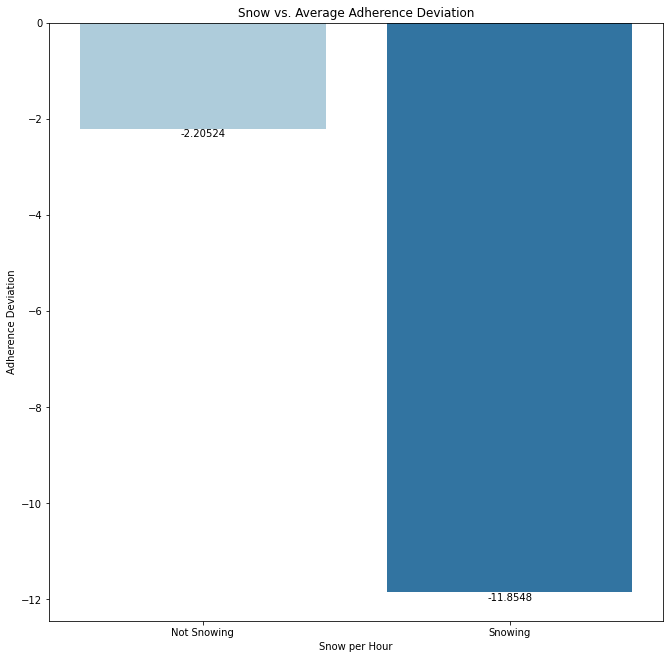

In [60]:
plt.figure(figsize=(11,11))
p = sns.barplot(x='IS_SNOWING',
           y='ADHERENCE',
            palette='Paired',    
           data = snow_groupby2.reset_index())
for i in p.containers:
    p.bar_label(i,)
plt.xlabel('Snow per Hour')
plt.ylabel('Adherence Deviation')
plt.title('Snow vs. Average Adherence Deviation')

In [61]:
#table for average adherence by rainfall amounts
rain_groupby2 = combined_df.groupby('precip_hrly')['ADHERENCE'].mean().reset_index()
rain_groupby2

,precip_hrly,ADHERENCE
0,0.00,-2.181648
1,0.01,-2.171960
2,0.02,-2.663179
3,0.03,-2.785831
4,0.04,-2.488004
...,...,...
65,0.97,-1.577693
66,1.01,-1.577693
67,1.04,-1.577693
68,1.29,-2.118899


In [62]:
# flipping negative to positive for charting
rain_groupby2['ADHERENCE']= rain_groupby2['ADHERENCE']*-1
rain_groupby2

,precip_hrly,ADHERENCE
0,0.00,2.181648
1,0.01,2.171960
2,0.02,2.663179
3,0.03,2.785831
4,0.04,2.488004
...,...,...
65,0.97,1.577693
66,1.01,1.577693
67,1.04,1.577693
68,1.29,2.118899


Text(0.5, 1.0, 'Rainfall vs. Average Adherence Deviation')

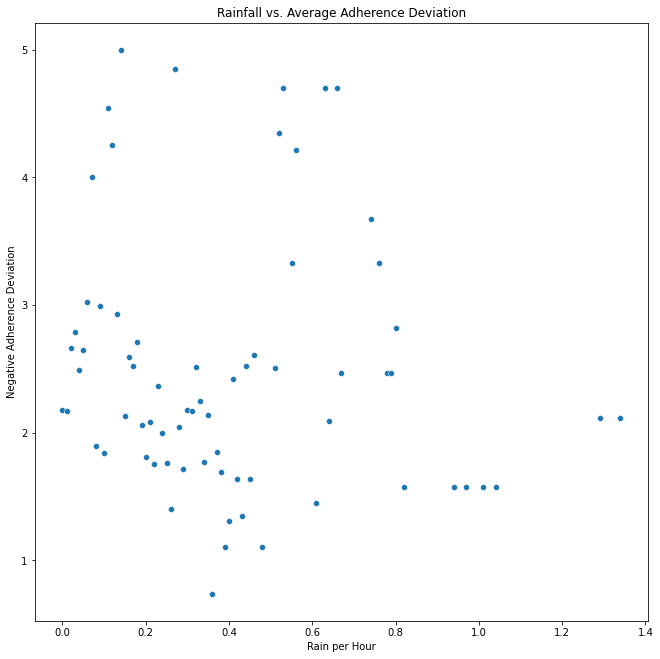

In [63]:
plt.figure(figsize=(11,11))
p = sns.scatterplot(x='precip_hrly',
           y='ADHERENCE',
            palette='Paired',    
           data = rain_groupby2.reset_index())
for i in p.containers:
    p.bar_label(i,)
plt.xlabel('Rain per Hour')
plt.ylabel('Negative Adherence Deviation')
plt.title('Rainfall vs. Average Adherence Deviation')

In [64]:
combined_df['GAPPED'] = np.where(combined_df['PERC_OF_HEADWAY']>= 0.5, 1, 0)
combined_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,precip_total,precip_hrly,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,NaN,0.0,NaN,14:53:00,both,0.141667,On Time,No Rain,Not Snowing,0
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,NaN,0.0,NaN,14:53:00,both,0.238095,On Time,No Rain,Not Snowing,0
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,NaN,0.0,NaN,14:53:00,both,NaN,On Time,No Rain,Not Snowing,0
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,NaN,0.0,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing,0
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,NaN,0.0,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,91057724,2022-11-01,50,329980,TO DOWNTOWN,MCC4_20,2,15:18:00,-2.733333,NaN,...,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0
2210133,91057851,2022-11-01,50,330003,TO DOWNTOWN,MLKS,1,15:20:00,12.900000,10.0,...,NaN,NaN,NaN,NaN,left_only,-0.236667,On Time,No Rain,Not Snowing,0
2210134,91057852,2022-11-01,50,330003,TO DOWNTOWN,MCC5_11,2,15:37:00,26.733333,NaN,...,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0
2210135,91057881,2022-11-01,56,330011,TO DOWNTOWN,MEIG,1,15:20:00,0.966666,0.0,...,NaN,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0


In [65]:
#creating above/below freezing column

def IS_FREEZING(value):
    if value > 32:
        return "Above Freezing"
    else:
        return "Below Freezing"

combined_df['IS_FREEZING'] = combined_df['temp'].map(IS_FREEZING)
combined_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,precip_hrly,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED,IS_FREEZING
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,0.0,NaN,14:53:00,both,0.141667,On Time,No Rain,Not Snowing,0,Above Freezing
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,0.0,NaN,14:53:00,both,0.238095,On Time,No Rain,Not Snowing,0,Above Freezing
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,0.0,NaN,14:53:00,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,0.0,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,0.0,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,91057724,2022-11-01,50,329980,TO DOWNTOWN,MCC4_20,2,15:18:00,-2.733333,NaN,...,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing
2210133,91057851,2022-11-01,50,330003,TO DOWNTOWN,MLKS,1,15:20:00,12.900000,10.0,...,NaN,NaN,NaN,left_only,-0.236667,On Time,No Rain,Not Snowing,0,Below Freezing
2210134,91057852,2022-11-01,50,330003,TO DOWNTOWN,MCC5_11,2,15:37:00,26.733333,NaN,...,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing
2210135,91057881,2022-11-01,56,330011,TO DOWNTOWN,MEIG,1,15:20:00,0.966666,0.0,...,NaN,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing


In [66]:
temp_groupby = combined_df.groupby(['IS_FREEZING', 'GAPPED_OR_BUNCHED']).agg({'TRIP_ID': 'count'})
above_below_freeze = temp_groupby.groupby(level=0).apply(lambda x:
                                              100* x/float(x.sum()))
above_below_freeze

TRIP_ID
IS_FREEZING    GAPPED_OR_BUNCHED           
Above Freezing Bunched             3.595468
               Gapped              4.391315
               On Time            92.013217
Below Freezing Bunched             2.707790
               Gapped              4.547227
               On Time            92.744983

In [67]:
temp_groupby2 = combined_df.groupby('temp')['ADHERENCE'].mean().reset_index()
temp_groupby2

,temp,ADHERENCE
0,14.0,-5.086830
1,15.0,-2.579399
2,16.0,-1.494466
3,17.0,-2.622335
4,18.0,-2.208596
...,...,...
82,96.0,-1.918301
83,97.0,-2.365581
84,98.0,-2.034372
85,99.0,-1.896802


Text(0.5, 1.0, 'Snow vs. Average Adherence Deviation')

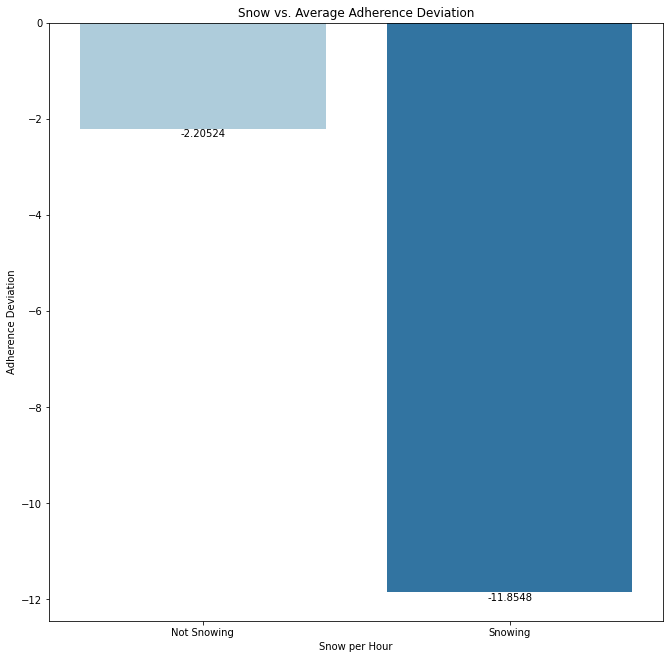

In [68]:
plt.figure(figsize=(11,11))
p = sns.barplot(x='IS_SNOWING',
           y='ADHERENCE',
            palette='Paired',    
           data = snow_groupby2.reset_index())
for i in p.containers:
    p.bar_label(i,)
plt.xlabel('Snow per Hour')
plt.ylabel('Adherence Deviation')
plt.title('Snow vs. Average Adherence Deviation')

In [69]:
combined_df['BUNCHED'] = np.where(combined_df['PERC_OF_HEADWAY'] <= -0.5, 1, 0)
combined_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED,IS_FREEZING,BUNCHED
0,76447164,2021-11-01,7,297750,TO DOWNTOWN,HBHS,1,14:10:00,-2.000000,14.0,...,NaN,14:53:00,both,0.141667,On Time,No Rain,Not Snowing,0,Above Freezing,0
1,76447165,2021-11-01,7,297750,TO DOWNTOWN,21BK,0,14:20:00,-3.350000,14.0,...,NaN,14:53:00,both,0.238095,On Time,No Rain,Not Snowing,0,Above Freezing,0
2,76447166,2021-11-01,7,297750,TO DOWNTOWN,MCC5_9,2,14:39:00,-20.183333,NaN,...,NaN,14:53:00,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing,0
3,76447167,2021-11-01,50,297749,TO DOWNTOWN,MLKS,1,15:10:00,-0.283333,NaN,...,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing,0
4,76447168,2021-11-01,50,297749,TO DOWNTOWN,MCC5_11,2,15:27:00,10.016666,NaN,...,NaN,15:53:00,both,NaN,On Time,No Rain,Not Snowing,0,Above Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,91057724,2022-11-01,50,329980,TO DOWNTOWN,MCC4_20,2,15:18:00,-2.733333,NaN,...,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing,0
2210133,91057851,2022-11-01,50,330003,TO DOWNTOWN,MLKS,1,15:20:00,12.900000,10.0,...,NaN,NaN,left_only,-0.236667,On Time,No Rain,Not Snowing,0,Below Freezing,0
2210134,91057852,2022-11-01,50,330003,TO DOWNTOWN,MCC5_11,2,15:37:00,26.733333,NaN,...,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing,0
2210135,91057881,2022-11-01,56,330011,TO DOWNTOWN,MEIG,1,15:20:00,0.966666,0.0,...,NaN,NaN,left_only,NaN,On Time,No Rain,Not Snowing,0,Below Freezing,0


In [70]:
combined_df[(combined_df["BUNCHED"]==1)]

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED,IS_FREEZING,BUNCHED
57,76448021,2021-11-01,22,298159,FROM DOWNTOWN,CV23,0,12:52:00,-0.083333,10.0,...,NaN,12:53:00,both,-0.578333,Bunched,No Rain,Not Snowing,0,Above Freezing,1
68,76448032,2021-11-01,22,298134,TO DOWNTOWN,CV23,0,14:44:00,-0.800000,10.0,...,NaN,14:53:00,both,-0.753333,Bunched,No Rain,Not Snowing,0,Above Freezing,1
86,76448050,2021-11-01,22,298161,FROM DOWNTOWN,CV23,0,17:52:00,0.566666,10.0,...,NaN,17:53:00,both,-0.895000,Bunched,No Rain,Not Snowing,0,Above Freezing,1
314,76448284,2021-11-01,22,298391,TO DOWNTOWN,CV23,0,07:09:00,-0.033333,15.0,...,NaN,07:53:00,both,-0.830000,Bunched,No Rain,Not Snowing,0,Above Freezing,1
383,76448353,2021-11-01,22,298416,FROM DOWNTOWN,CV23,0,17:18:00,0.083333,15.0,...,NaN,17:53:00,both,-0.550000,Bunched,No Rain,Not Snowing,0,Above Freezing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209779,91055314,2022-11-01,56,329076,FROM DOWNTOWN,SAMS,0,16:45:00,-5.933333,11.0,...,NaN,NaN,left_only,-0.600000,Bunched,No Rain,Not Snowing,0,Below Freezing,1
2209899,91055803,2022-11-01,7,329280,FROM DOWNTOWN,21BK,0,15:13:00,0.316666,21.0,...,NaN,NaN,left_only,-0.548413,Bunched,No Rain,Not Snowing,0,Below Freezing,1
2209902,91055806,2022-11-01,7,329292,TO DOWNTOWN,21BK,0,15:59:00,-4.883333,15.0,...,NaN,NaN,left_only,-0.628889,Bunched,No Rain,Not Snowing,0,Below Freezing,1
2210030,91055940,2022-11-01,7,329437,TO DOWNTOWN,HBHS,1,15:19:00,-8.700000,15.0,...,NaN,NaN,left_only,-0.887778,Bunched,No Rain,Not Snowing,0,Below Freezing,1


In [71]:
bunched_df = combined_df[(combined_df["BUNCHED"]==1)]
bunched_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED,IS_FREEZING,BUNCHED
57,76448021,2021-11-01,22,298159,FROM DOWNTOWN,CV23,0,12:52:00,-0.083333,10.0,...,NaN,12:53:00,both,-0.578333,Bunched,No Rain,Not Snowing,0,Above Freezing,1
68,76448032,2021-11-01,22,298134,TO DOWNTOWN,CV23,0,14:44:00,-0.800000,10.0,...,NaN,14:53:00,both,-0.753333,Bunched,No Rain,Not Snowing,0,Above Freezing,1
86,76448050,2021-11-01,22,298161,FROM DOWNTOWN,CV23,0,17:52:00,0.566666,10.0,...,NaN,17:53:00,both,-0.895000,Bunched,No Rain,Not Snowing,0,Above Freezing,1
314,76448284,2021-11-01,22,298391,TO DOWNTOWN,CV23,0,07:09:00,-0.033333,15.0,...,NaN,07:53:00,both,-0.830000,Bunched,No Rain,Not Snowing,0,Above Freezing,1
383,76448353,2021-11-01,22,298416,FROM DOWNTOWN,CV23,0,17:18:00,0.083333,15.0,...,NaN,17:53:00,both,-0.550000,Bunched,No Rain,Not Snowing,0,Above Freezing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209779,91055314,2022-11-01,56,329076,FROM DOWNTOWN,SAMS,0,16:45:00,-5.933333,11.0,...,NaN,NaN,left_only,-0.600000,Bunched,No Rain,Not Snowing,0,Below Freezing,1
2209899,91055803,2022-11-01,7,329280,FROM DOWNTOWN,21BK,0,15:13:00,0.316666,21.0,...,NaN,NaN,left_only,-0.548413,Bunched,No Rain,Not Snowing,0,Below Freezing,1
2209902,91055806,2022-11-01,7,329292,TO DOWNTOWN,21BK,0,15:59:00,-4.883333,15.0,...,NaN,NaN,left_only,-0.628889,Bunched,No Rain,Not Snowing,0,Below Freezing,1
2210030,91055940,2022-11-01,7,329437,TO DOWNTOWN,HBHS,1,15:19:00,-8.700000,15.0,...,NaN,NaN,left_only,-0.887778,Bunched,No Rain,Not Snowing,0,Below Freezing,1


In [72]:
# bunched_df = combined_df.loc[(combined_df["BUNCHED"]==1) & (combined_df["TRIP_EDGE"]==1)]
# bunched_df

In [73]:
gapped_df = combined_df[(combined_df["GAPPED"]==1)]
gapped_df

,ADHERENCE_ID,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE,SCHEDULED_HDWY,...,snow_hrly,Time,_merge,PERC_OF_HEADWAY,GAPPED_OR_BUNCHED,IS_RAINING,IS_SNOWING,GAPPED,IS_FREEZING,BUNCHED
21,76447985,2021-11-01,22,298129,TO DOWNTOWN,CV23,0,06:54:00,-12.483333,15.0,...,NaN,06:53:00,both,0.671111,Gapped,No Rain,Not Snowing,1,Above Freezing,0
144,76448110,2021-11-01,22,298239,TO DOWNTOWN,CLFF,1,07:00:00,-0.700000,60.0,...,NaN,07:53:00,both,0.698611,Gapped,No Rain,Not Snowing,1,Above Freezing,0
158,76448124,2021-11-01,22,298253,FROM DOWNTOWN,CV23,0,08:55:00,-9.100000,15.0,...,NaN,08:53:00,both,0.536667,Gapped,No Rain,Not Snowing,1,Above Freezing,0
169,76448135,2021-11-01,22,298242,TO DOWNTOWN,CV23,0,10:34:00,-7.500000,10.0,...,NaN,10:53:00,both,0.760000,Gapped,No Rain,Not Snowing,1,Above Freezing,0
262,76448230,2021-11-01,22,298319,TO DOWNTOWN,CV23,0,16:24:00,-6.866666,10.0,...,NaN,16:53:00,both,0.523333,Gapped,No Rain,Not Snowing,1,Above Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209896,91055800,2022-11-01,7,329291,TO DOWNTOWN,21BK,0,14:26:00,-1.466666,6.0,...,NaN,NaN,left_only,2.822222,Gapped,No Rain,Not Snowing,1,Below Freezing,0
2209901,91055805,2022-11-01,7,329292,TO DOWNTOWN,HBHS,1,15:49:00,-5.483333,15.0,...,NaN,NaN,left_only,0.785556,Gapped,No Rain,Not Snowing,1,Below Freezing,0
2209905,91055809,2022-11-01,7,329281,FROM DOWNTOWN,21BK,0,16:47:00,-3.816666,15.0,...,NaN,NaN,left_only,0.587778,Gapped,No Rain,Not Snowing,1,Below Freezing,0
2209980,91055888,2022-11-01,7,329407,FROM DOWNTOWN,21BK,0,15:48:00,-8.033333,15.0,...,NaN,NaN,left_only,0.558889,Gapped,No Rain,Not Snowing,1,Below Freezing,0


<AxesSubplot:xlabel='precip_hrly', ylabel='ADHERENCE'>

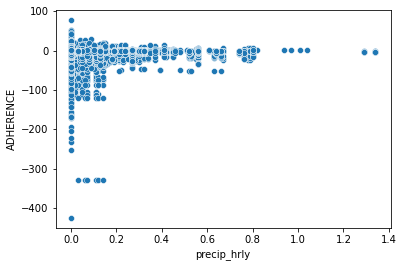

In [74]:
sns.scatterplot(x="precip_hrly",
               y="ADHERENCE",
               data=bunched_df)

In [130]:
combined_df_no_nulls['IS_RAINING'].value_counts()

No Rain    1437191
Raining      70156
Name: IS_RAINING, dtype: int64